In [1]:
import sys 
#sys.path.append('..')
import neftpy.upvt_oil as pvt
import neftpy.uconvert as uc

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
from sympy import *
init_printing()

# Объемный коэффициент нефти

## Корреляция при давлении выше давления насыщения

Корреляция для объемного коэффициента нефти при давлении выше давления насыщения в некоторых источниках указывается, что она принадлежит Стендингу, в некоторых Vasquez & Beggs. На самом деле это не корреляция, так как природа ее происхождения не статистическая, а вполне себе физическое уравнение.

$$ B_o = B_{ob} \cdot \exp(c_o(p_b - p)) $$

где:

$ B_o $ - объемный коэффициент нефти при давлении p, м3/м3

$ B_{ob} $ - объемный коэффициент нефти при давлении насыщения, м3/м3

$ c_o $ - сжимаемость нефти, 1/МПа

$ P $ - давление, МПа

$ P_b $ - давление насыщения, МПа


### Корреляция Маккейна при давлении меньше или равном давлению насыщения

Уравнение выводится из материального баланса и не является корреляцией.

$$ b_o = \left( \frac{ \rho_{STO} + 0.01357 R_s \gamma_g}{\rho_{or}}\right) $$

где:

$ b_o $ - объемный коэффициент нефти при давлении $P$, м3/м3

$ \rho_{STO} $ - плотность дегазированной нефти, фунт/фт3 (кг/м3)

$ R_s $ - газосодержание при давлении p, фт3/баррель (м3/м3)

$ \gamma_g $ - плотность газа относительно воздуха

$ \rho_{or} $ - плотность пластовой нефти, фунт/фт3 (кг/м3)

#### Внутри функции уже реализован перевод величин, единицы измерения в скобках - входные параметры в функцию

исходное выражение


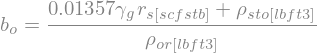

коэффициенты преобразования


преобразованное выражение


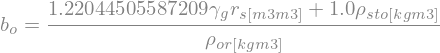

In [27]:
# объявления переменных необходимых для преобразования единиц в вырожении
b_o = symbols('b_o')
rho_sto_lbft3, rho_or_lbft3 = symbols('rho_sto[lbft3] rho_or[lbft3]')
rs_scfstb, gamma_g = symbols('r_s[scfstb] gamma_g')
rs_m3m3 = symbols('r_s[m3m3]')
rho_sto_kgm3, rho_or_kgm3 = symbols('rho_sto[kgm3] rho_or[kgm3]')

# определение алгоритма расчета в американских промысловых единицах
eq1 = Eq(b_o, (rho_sto_lbft3 + 0.01357 * rs_scfstb * gamma_g)/rho_or_lbft3)
# покажем выражения в печатном виде
print('исходное выражение')
display(eq1)

# выражения для преобразования единиц измерения из американских промысловых в практические метрические
# для работы с коэффициентами преобразования используем модуль neftpy.uconvert 
scfstb_to_m3m3 = rs_m3m3 * uc.m3m3_2_scfstb(1)
sto_lbft3_to_kgm3 = rho_sto_kgm3 * uc.kgm3_2_lbft3(1)
or_lbft3_to_kgm3 = rho_or_kgm3 * uc.kgm3_2_lbft3(1)

# покажем выражения в печатном виде
print('коэффициенты преобразования')
display(Eq(rs_scfstb , scfstb_to_m3m3))
display(Eq(rho_sto_lbft3 , sto_lbft3_to_kgm3))

# преобразование алгоритма в метрические единицы с использованием символьных вычислений
eq1_m = simplify(eq1.subs(rs_scfstb, scfstb_to_m3m3)
                    .subs(rho_sto_lbft3, sto_lbft3_to_kgm3)
                    .subs(rho_or_lbft3, or_lbft3_to_kgm3)
                )
# вывод результатов преобразований
print('преобразованное выражение')
display(eq1_m)

# Список литературы

1. "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases", M.B. Standing, Drill. & Prod. Prac., API, 1947.
2. "Correlation of Black Oil Properties at Pressures Below Bubblepoint Pressure—A New Approach",
    J. VELARDE, T.A. BLASINGAME Texas A&M University, W.D. MCCAIN, JR. S.A. Holditch & Associates, Inc 1999
3. "Reservoir oil bubblepoint pressures revisited; solution gas–oil ratios and surface gas specific gravities",
    J. VELARDE, W.D. MCCAIN, 2002